In [13]:
# imports
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import descartes
from shapely.geometry import Polygon


ModuleNotFoundError: No module named 'libspatialindex'

In [4]:
# base layers
indonesia = gpd.read_file("data/indonesia-provinces.geojson") # source: https://github.com/superpikar/indonesia-geojson/blob/master/indonesia.geojson
# indonesia = gpd.read_file("data/indonesia_boundary.json") # source: https://geodata.mit.edu/catalog/stanford-py486tm4357
logging_concessions = gpd.read_file("data/Managed_Forest_Concessions_(WRI).geojson")
oil_palm_concessions = gpd.read_file("data/Greenpeace_Indonesia_Oil_Palm_Concessions_Map_Nov_2020.shp")
grid = pd.read_csv("data/land_features_cells.csv")

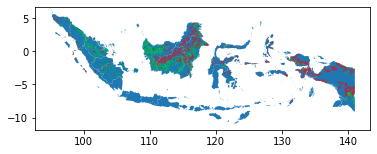

In [5]:
# plotting
fig = plt.figure()
ax = plt.subplot(111)

indonesia.plot(ax=ax) # plot indonesia
logging_concessions.plot(ax=ax, color="red", alpha=.6) # plot concession regions

oil_palm_concessions.plot(ax=ax, color="lime", alpha=.6) # plot concession regions
# grid.plot.scatter(x='geo_x', y='geo_y', s=5, ax=ax, color="yellow") # plot grid coordinates
# filtered.plot.scatter(x='geo_x', y='geo_y', s=0.08,ax=ax, color="red") # plot grid coordinates


plt.axis('scaled')
plt.show()

In [ ]:
# compare overlap of oil palm and logging:
# area:
# count # of logging concessions: num_lc_with_opc_overlap = 196 (out of 557) = 35.18%
# count # of oil palm concessions: num_opc_with_lc_overlap = 866 (out of 12259) = 7.06%

In [ ]:
intersect = []
for j, oilpalm_conc in enumerate(oil_palm_concessions['geometry']):
    track = []
    for i, logging_conc in enumerate(logging_concessions['geometry']):
        overlap = logging_conc.intersection(oilpalm_conc)
        track.append(overlap)
        
    print(sum(track))
    intersect.append(track)
print(len(intersect), len(intersect[0]))

In [30]:
intersect_indicator = []
intersect_geoms = []
for i, logging_conc in enumerate(logging_concessions['geometry']):
    track_ind = []
    track_geoms = []
    for j, oilpalm_conc in enumerate(oil_palm_concessions['geometry']):
        overlap = logging_conc.intersection(oilpalm_conc)

        if overlap:
            track_ind.append(1)
        else:
            track_ind.append(0)

        track_geoms.append(overlap)
        
        
    print(sum(track_ind))
    intersect_indicator.append(track_ind)
    intersect_geoms.append(track_geoms)
    
print(len(intersect_indicator), len(intersect_indicator[0]))

# rows are logging, cols are oil palm

0
2
0
17
0
0
1
10
4
0
2
0
0
0
1
3
3
42
0
0
8
0
27
1
0
4
1
5
0
1
0
0
0
0
0
0
0
1
0
0
2
0
1
0
1
7
0
3
0
0
0
1
10
10
0
1
2
0
9
16
0
8
1
6
0
2
3
4
3
4
1
3
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
2
0
1
2
3
0
0
5
34
7
0
7
0
0
3
4
5
4
2
0
1
9
1
0
0
0
0
4
5
0
3
7
0
5
0
0
0
1
2
1
1
1
7
22
1
0
2
0
0
0
1
7
6
0
1
0
0
0
0
0
0
0
14
4
0
0
3
0
1
3
1
8
0
6
0
2
15
9
5
0
0
0
6
0
0
0
9
0
1
3
1
0
2
1
1
0
1
0
0
30
0
0
0
0
2
1
0
0
2
0
0
0
3
0
0
0
0
0
0
0
0
0
6
4
3
9
2
0
0
0
0
0
1
0
0
0
0
0
0
0
0
1
0
0
0
1
0
0
0
0
7
1
2
0
0
0
0
0
0
0
0
0
0
0
0
16
1
0
0
0
0
15
7
0
0
0
4
0
0
1
1
0
0
0
4
5
3
0
5
0
0
0
0
0
0
0
0
0
0
6
1
4
0
0
0
0
0
1
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
5
6
1
0
0
2
2
1
1
0
2
0
0
0
0
0
0
0
0
2
1
0
0
1
0
0
0
1
0
8
0
1
0
0
0
11
1
0
0
0
0
0
0
0
0
0
0
39
0
11
5
0
0
9
0
0
0
2
0
1
8
0
0
0
0
0
4
0
0
0
2
0
2
1
11
7
0
0
4
0
1
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
45
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
3
1
0
0
2
0
0
0
5
2
1
0
0
2
0
11
6
1
3
0
3
2
0
3
29
1
0
0
1
1
0
0
0

In [55]:
total_intersect_area = 0
# intersect_areas = []
for row in intersect_geoms:
    # areas = []
    for geom in row:
        print(type(geom))
        if geom:
            print(geom)
            # areas.append(geom.area)

            total_intersect_area += sum(geom.area)
print(total_intersect_area)


<class 'shapely.geometry.collection.GeometryCollection'>
<class 'shapely.geometry.collection.GeometryCollection'>
<class 'shapely.geometry.collection.GeometryCollection'>
<class 'shapely.geometry.collection.GeometryCollection'>
<class 'shapely.geometry.collection.GeometryCollection'>
<class 'shapely.geometry.collection.GeometryCollection'>
<class 'shapely.geometry.collection.GeometryCollection'>
<class 'shapely.geometry.collection.GeometryCollection'>
<class 'shapely.geometry.collection.GeometryCollection'>
<class 'shapely.geometry.collection.GeometryCollection'>
<class 'shapely.geometry.collection.GeometryCollection'>
<class 'shapely.geometry.collection.GeometryCollection'>
<class 'shapely.geometry.collection.GeometryCollection'>
<class 'shapely.geometry.collection.GeometryCollection'>
<class 'shapely.geometry.collection.GeometryCollection'>
<class 'shapely.geometry.collection.GeometryCollection'>
<class 'shapely.geometry.collection.GeometryCollection'>
<class 'shapely.geometry.collec

TypeError: 'float' object is not iterable

In [45]:
intersect_indicator_df = pd.DataFrame(intersect_indicator)
col_count = len(intersect_indicator_df.iloc[0,:])
row_count = len(intersect_indicator_df.iloc[:,0])

In [46]:
print(row_count, col_count)
# rows are LOGGING, cols are OIL

557 12259


In [48]:
print(sum(intersect_indicator_df.iloc[1,:]))

2


In [50]:
num_lc_with_opc_overlap = 0
for i in range(row_count):
    row = intersect_indicator_df.iloc[i,:]  # a logging concession
    num_lc_with_opc_overlap += int(sum(row) > 0)

num_opc_with_lc_overlap = 0
for i in range(col_count):
    col = intersect_indicator_df.iloc[:,i] # an oil palm concession
    num_opc_with_lc_overlap += int(sum(col) > 0)

print("num_lc_with_opc_overlap", num_lc_with_opc_overlap)
print("num_opc_with_lc_overlap", num_opc_with_lc_overlap)

num_lc_with_opc_overlap 196
num_opc_with_lc_overlap 866


In [31]:
num_lc_with_opc_overlap = 0
for row in intersect_indicator:
    num_lc_with_opc_overlap += int(sum(row) > 0)
print(num_lc_with_opc_overlap)

num_lc_with_opc_overlap = 0
for row in intersect_indicator:
    num_lc_with_opc_overlap += int(sum(row) > 0)
print(num_lc_with_opc_overlap)


196


In [25]:
#  intersection of all logging concessions with 
intersect = []
for j, oilpalm_conc in enumerate(oil_palm_concessions['geometry']):
    overlap = logging_concessions['geometry'].intersection(oilpalm_conc)
    intersect.append(overlap)

print(len(intersect), len(intersect[0]))

12259 557


In [ ]:
# { conc id: area overlap, ids of other conc overlap with}